Escribo acá algunos posibles ejercicios.

### Intuicion de distribución del máximo.

Sabemos que un histograma aproxima *(de una forma burda)* la función de densidad $f(x)$ a partir de la cual se generaron los datos $x_1, x_2, \dots, x_n$, asumiendo que son **realizaciones** de variables aleatorias $X_1, X_2, \dots, X_n \ \text{iid}$ con $X_1 \sim f$ 

In [ ]:
gridx <- seq(-3,3, 0.1)
hist(rnorm(1e5), prob=T, ylim=c(0,0.45), col='steelblue', main="Histograma de Datos ~ N(0,1)")
lines(gridx, dnorm(gridx), lwd=3, col='orange')

En el problema de modelado de máximos, queremos encontrar una función $g(x)$ a partir de la cual se generaron los datos $\hat x_1, \hat x_2, \dots ,\hat x_m$, asumiendo que son **realizaciones** de variables aleatorias $\hat X_1, \hat X_2, \dots, \hat X_m \ \text{iid}$ con $\hat X_1 \sim g$

Siendo concretos, los datos que queremos modelar son:

* Los que sobrepasan algún umbral
  * ej: "$x_i$ mayores a 30", "$x_i$ mayores al 95 percentil"
    
    
* Los máximos en un período (bloque) dado
  * ej: "teniendo $x_i$ diarios, quiero el mayor $x_i$ de cada año"
  
Llamamos $\hat x_i$ a los $x_i$ que cumplen su condición de "**máximo**" en cualquiera de los casos.

En otras palabras, solo estamos interesados en **la cola de la distribución**.


### Antes de pasar al siguiente ejercicio:

>  ¿Podés imaginar cómo resultaría un histograma de los **valores máximos** $\hat x_i$ que se encuentran **en la cola** de una Normal(0,1) como la anterior, a medida que la cantidad de muestras tiende a infinito?
>
> ¿Podés ver por qué ésto no es así? Qué sucede "alrededor" del umbral? ¿Por qué?

> > ### RTA
> > Es razonable pensar que un histograma de los valores de la cola de una Normal, será exactamente igual que recortar la cola de un histograma "completo".
> > 
> > Pero al tener un umbral que **descarta** los valores por debajo del mismo, podemos ver cómo la probabilidad (área) de caer en un entorno de $u$ se redujo a la mitad
> >
> > ![intro.png](../Imagenes/intro.png)

# Ejercicio 1.

Realice un **histograma del percentil 90** como umbral de una muestra **Normal estándar** de `1e5` elementos.

Agregue una curva de densidad estimada $\hat g$ utilizando la función `density` sobre los **datos del histograma**.

### RTA

Realizamos un histograma de los datos por encima del umbral. Para filtrarlos:
> `datos[datos > umbral]`

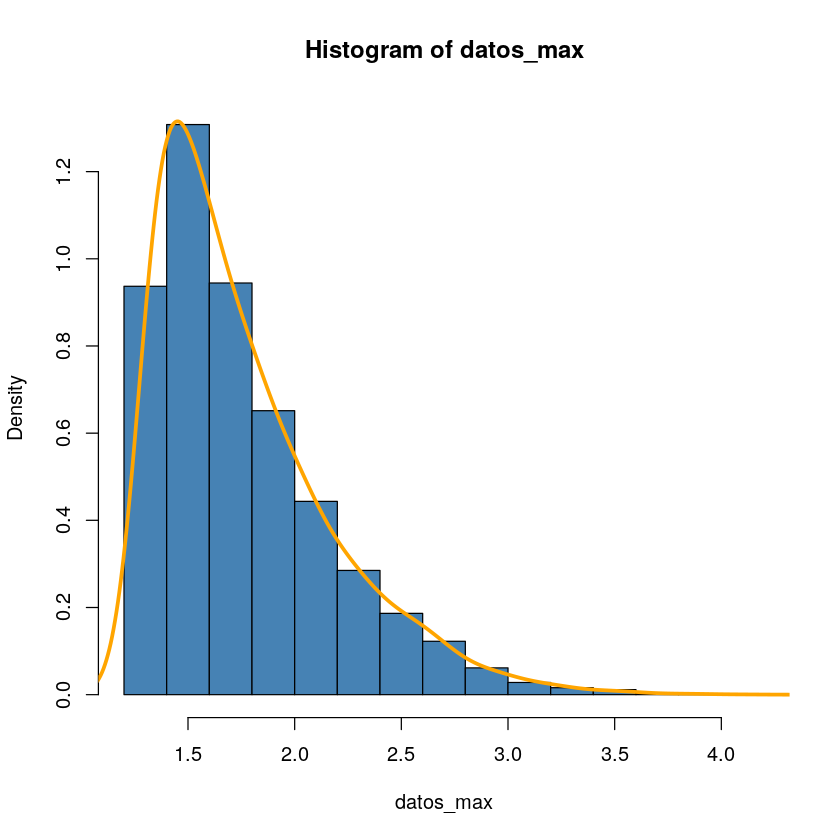

In [114]:
datos  <- rnorm(1e5)
umbral <- quantile(datos, 0.9, names=F)
datos_max <- datos[datos > umbral]
g_estim   <- density(datos_max, bw=0.1)
hist(datos_max, prob=T, col='steelblue', ylim=c(0, max(g_estim$y)))
lines(g_estim, lwd=3, col='orange')